In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

In [2]:
with open('C:/Users/SHAIKH MD KASHIF/Downloads/test/test.json') as json_file:
    data = json.load(json_file)
json_data = json.dumps(data)
df = pd.read_json(json_data)
df                                      #### JSON TASKS###

,session_name,session_description,design_state_data
algorithms,test,test,{'RandomForestClassifier': {'model_name': 'Ran...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_reduction,test,test,"{'feature_reduction_method': 'Tree-based', 'nu..."
hyperparameters,test,test,"{'stratergy': 'Grid Search', 'shuffle_grid': T..."
metrics,test,test,"{'optomize_model_hyperparameters_for': 'AUC', ..."
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid - ...
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."


In [3]:
df["design_state_data"][0]

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'GBTClassifier': {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'learningRate': [],
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_i

In [4]:
db=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\DS_Assignment - internship\\Screening Test - DS\\iris.csv")
db.head()                 #### Loading a Csv File:-

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
target_variable=db["petal_width"]
target_variable.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [6]:
db["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#db["Contionous"]=["sepa_length","sepal_width","petal_length"]
#db["Discrete"]=["Species"]

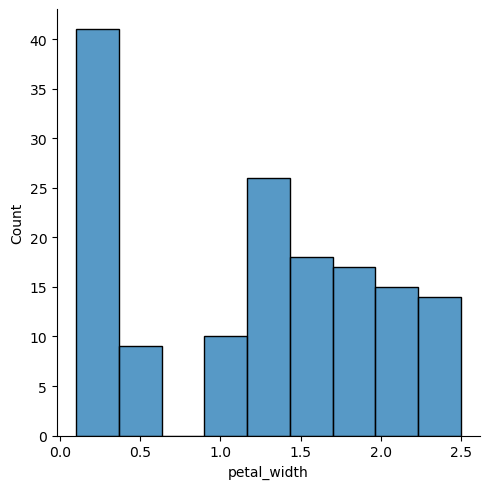

In [9]:
sns.displot(target_variable)
plt.show()

In [10]:
db.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# DATA CLEANING :-

In [11]:
db.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are noi null values here in this data 

SEARCHING OF THE OUTLIERS

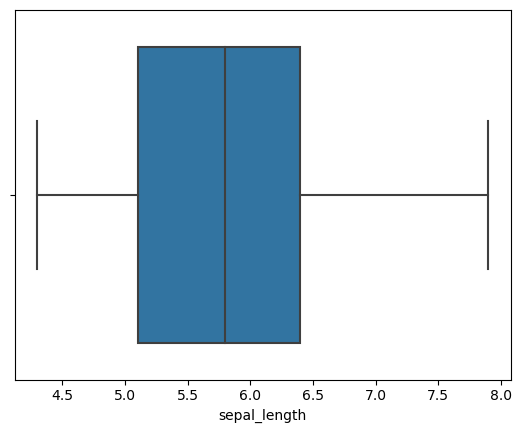

In [12]:
sns.boxplot(db["sepal_length"])
plt.show()

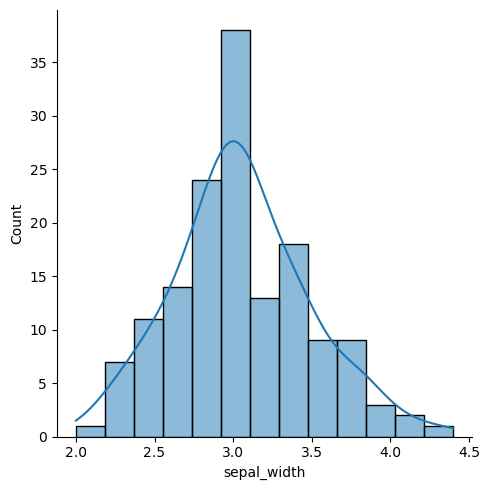

In [13]:
sns.displot(db["sepal_width"],kde=True)
plt.show()

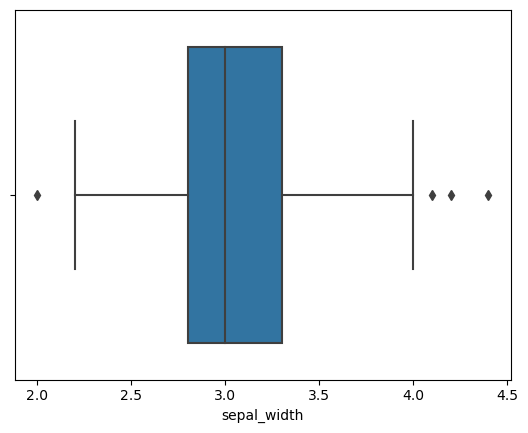

In [14]:
sns.boxplot(db["sepal_width"])
plt.show()

In [15]:
db[db["sepal_width"]>4]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


CHECKINNG OF SKEWNESS

In [16]:
a=db["sepal_length"].skew()
b=db["sepal_width"].skew()                  ## NORMAL SKEWNESS IS IN_BTWN -1 to 1          
c=db["petal_length"].skew()
print(a,b,c)                               

0.3149109566369728 0.3340526621720866 -0.27446425247378287


# ENCODING:-

-HERE WE HAVE TO DO ENCODING BECAUSE OF THE FEATURE - SPECIES- AS THE MACHINE CAN'T UNDERSTAND CATEGORICAL DATA
-HERE THE GIVEN CATEGORICAL DATA ARE JUST SPECIES NAMES SO WE HAVE TO GO WITH NOMINAL ENCODING - DUMMY VARIABLE TRAP

In [17]:
db=pd.get_dummies(db,columns=["species"],drop_first=True)

In [18]:
db.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [19]:
x=db.drop("petal_width",axis=1)
y=target_variable

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=182)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [22]:
PipelineDict={0:"Linear Regression",1:"Lasso",2:"Ridge",3:"ElasticNet",4:"RandomForestRegressor"}

In [23]:
LinearRegressionPipeline=Pipeline([("Linear Regression",LinearRegression())])
LassoPipeline=Pipeline([("Lasso",Lasso())])
RidgePipeline=Pipeline([("Ridge",Ridge())])
ElasticNetPipeline=Pipeline([("ElasticNet",ElasticNet())])
RandomForestRegressorPipeline=Pipeline([("RFG",RandomForestRegressor())])

In [24]:
mypipeline=[LinearRegressionPipeline,LassoPipeline,RidgePipeline,ElasticNetPipeline,RandomForestRegressorPipeline]

In [25]:
for model in mypipeline:
    model.fit(x_train,y_train)

In [26]:
accuracy=0
classifier=0
pipeline=""

In [27]:
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy:{}".format(PipelineDict[i],model.score(x_test,y_test)))
    print("{} Train Accuracy:{}".format(PipelineDict[i],model.score(x_train,y_train)))

Linear Regression Test Accuracy:0.9387987374025158
Linear Regression Train Accuracy:0.9565082213606532
Lasso Test Accuracy:0.30916608106455146
Lasso Train Accuracy:0.3901873078261632
Ridge Test Accuracy:0.9317811253043822
Ridge Train Accuracy:0.9521606645330485
ElasticNet Test Accuracy:0.6531392293436931
ElasticNet Train Accuracy:0.731099961226549
RandomForestRegressor Test Accuracy:0.9257515469654006
RandomForestRegressor Train Accuracy:0.9913834894176043


In [28]:
for i,model in enumerate(mypipeline):
    if model.score(x_test,y_test)>accuracy:
        accuracy=model.score(x_test,y_test)
        pipeline=model
        classifier=i
print("classifier with best acuracy:{}".format(PipelineDict[classifier]))
## We got the best ttwo Results with - Linear Regression - and with - RandomForestRegressor - and we will try to get if it's getting better Results with Grid-SearchCV

classifier with best acuracy:Linear Regression


# We will check to verify whether we get better results by optimization using Grid-search CV - Rfg Boost Algo

In [29]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor()
param_grid={"n_estimators":[1,5,10,20,40,100],
                                "criterion" : ["squared_error", "absolute_error", "poisson"],
                                "max_features" : ["auto", "sqrt", "log2"]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
print(grid.best_params_)
grid.best_estimator_

{'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 1}


RandomForestRegressor(n_estimators=1)

In [30]:
grid.best_estimator_.feature_importances_

array([0.01290174, 0.03381042, 0.82634903, 0.12693881, 0.        ])

In [31]:
caash=pd.DataFrame(index=x.columns,data=grid.best_estimator_.feature_importances_,columns=["importances"])
Feat_importance=caash[caash["importances"]>0.01]
Feat_importance

,importances
sepal_length,0.012902
sepal_width,0.033810
petal_length,0.826349
species_Iris-versicolor,0.126939


In [32]:
imp_list=caash[caash["importances"]>0.01].index.to_list()
imp_list

['sepal_length', 'sepal_width', 'petal_length', 'species_Iris-versicolor']

In [33]:
x[imp_list]

,sepal_length,sepal_width,petal_length,species_Iris-versicolor
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,0
146,6.3,2.5,5.0,0
147,6.5,3.0,5.2,0
148,6.2,3.4,5.4,0


In [34]:
xgd=x[imp_list]
ygd=target_variable

In [35]:
x_train,x_test,y_train,y_test=train_test_split(xgd,ygd,test_size=0.2,random_state=182)

In [36]:
gdmodel=RandomForestRegressor(n_estimators=1,criterion="squared_error",max_features="auto")
gdmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1)

In [37]:
y_pred_train=gdmodel.predict(x_train)
y_pred_test=gdmodel.predict(x_test)

In [38]:
print(gdmodel.score(x_train,y_train))
print(gdmodel.score(x_test,y_test))        
# -- Here the cconclusion is we have to go with the normal one ( Eithout Opyimzation as it give the better results with using the Algorithm Linear Regression of an Accuracy of )

0.972250259351803
0.8901872448261298


In [45]:
final_model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=182)
final_model.fit(x_train,y_train)
y_pred_train=final_model.predict(x_train)
y_pred_test=final_model.predict(x_test)
print("Train:",final_model.score(x_test,y_test))
print("Test:",final_model.score(x_train,y_train))
score=cross_val_score(final_model,x,y,cv=5)
print(score)
score.mean()

Train: 0.9387987374025158
Test: 0.9565082213606532
[0.36003685 0.92627636 0.59314457 0.83853395 0.12945751]


0.5694898462394125

from joblib import dump
dump(final_model,"iris.joblib")

In [56]:
db.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [58]:
from joblib import load
loadmodel=load("iris.joblib")                        ### Prediction---#### Verifying 
loadmodel.predict([[5.1,3.5,1.4,0,0]])                 

array([0.23967726])

# Conclusion :-

By appplying various Algorithms along with hperparameter Optimization we got the Following Results are :-

Without Hyperparameter Tuning:-

Linear Regression Test Accuracy:0.9387987374025158

Linear Regression Train Accuracy:0.9565082213606532

Lasso Test Accuracy:0.30916608106455146

Lasso Train Accuracy:0.3901873078261632

Ridge Test Accuracy:0.9317811253043822

Ridge Train Accuracy:0.9521606645330485

ElasticNet Test Accuracy:0.6531392293436931

ElasticNet Train Accuracy:0.731099961226549

RandomForestRegressor Test Accuracy:0.9257515469654006

RandomForestRegressor Train Accuracy:0.9913834894176043

# Optimizing the Results (Linear Regression) in order to get Best Results:-

Train: 0.9387987374025158

Test: 0.9565082213606532